Figure 3 from Mastroguiseppe & Osotjic '18.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_palette("colorblind")

In [2]:
# Parameters
N = 1000
g = .9
T = 200
phi = lambda x: np.tanh(x)
rng = np.random.RandomState(123)
J = rng.normal(scale = g / np.sqrt(N), size=(N, N))

In [3]:
def sim_network(J, I = np.zeros(N,), w = np.zeros(N,)):
    """J: connectivity (N,N)
       I: input (N, )
       w: readout (N, ) 
    """
    x = rng.normal(size=(N, )) * 1
    x_t = []
    print(I.sum())
    for t in range(T):
        if (t> 30) and (t< 50):
            x = 0.9 * x + np.dot(J, phi(x)) + I
        else:
            x = 0.9 * x + np.dot(J, phi(x)) 
        x_t.append(x)
    x_t = np.array(x_t)
    z_t = np.dot(phi(x_t), w)
    return x_t, z_t

## Spontaneous activity

0.0


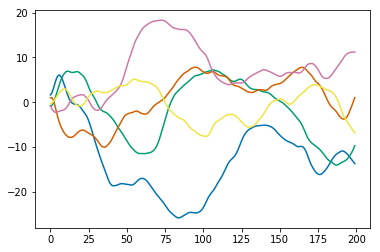

In [4]:
x_t, _ = sim_network(J, np.zeros(N))
plt.plot(x_t[:,:5]);

## GO-NoGo

In [5]:
# Generate random go / no go patters
I_go = rng.normal(size=(N, ))
I_nogo = rng.normal(size=(N, ))
w = rng.normal(size=(N, ), scale=1/np.sqrt(N)) # readout
# Low rank perturbation
n = I_go
m = w
J2 = J + .1 * np.dot(m[:,None], n[None,:])

In [6]:
def simulate(I):
    x = rng.normal(size=(N, )) 
    x_t = []
    for t in range(T):
        if (t>25) and (t<75):
            x = 0.9 * x + np.dot(J2, phi(x)) + I
        else:
            x = 0.9 * x + np.dot(J2, phi(x)) 
        x_t.append(x)
    x_t = np.array(x_t)
    z_t = np.dot(phi(x_t), w)
    return x_t, z_t

In [7]:
n_reps = 10
go_resp = np.zeros((n_reps, T))
nogo_resp = np.zeros((n_reps, T))
for r in range(n_reps):
    _, go_resp[r] = simulate(I_go)
    _, nogo_resp[r] = simulate(I_nogo)

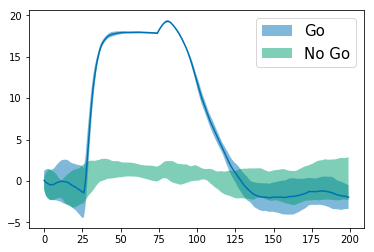

In [9]:
plt.plot(go_resp.mean(0))
plt.fill_between(np.arange(T), go_resp.mean(0) - go_resp.std(0), 
                 go_resp.mean(0) + go_resp.std(0), alpha=0.5, label = 'Go')
plt.fill_between(np.arange(T), nogo_resp.mean(0) - nogo_resp.std(0), 
                 nogo_resp.mean(0) + nogo_resp.std(0), alpha=0.5, label = 'No Go')
plt.legend(fontsize=15)